In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from lifetimes.datasets import *
import datetime
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes import GammaGammaFitter

## RFM(Recency/Frequency/Monetary) for Customer

In [2]:
rfm_customer = pd.read_excel("GG_all_final.xlsx", sheet_name="RFM_customer")

In [3]:
rfm_customer.head()

,User_unique,Min_of_created_date,Max_of_created_date,Count_of_orderId,Frequency,Recency,T,Monetary
0,1,2016-01-03,2016-07-20,474,473,199,199,317100.0
1,2,2016-01-04,2016-02-07,4,3,34,198,5700.0
2,12,2016-06-12,2016-06-12,1,0,0,38,31100.0
3,23,2016-01-28,2016-06-23,3,2,147,174,3500.0
4,32,2016-01-23,2016-01-28,2,1,5,179,1100.0


In [4]:
rfm_customer=rfm_customer.drop(['Min_of_created_date', 'Max_of_created_date', 'Count_of_orderId'], axis=1)

In [5]:
bgf = BetaGeoFitter()
bgf.fit(rfm_customer['Frequency'], rfm_customer['Recency'], rfm_customer['T'])

<lifetimes.BetaGeoFitter: fitted with 60488 subjects, a: 0.25, alpha: 0.00, b: 0.23, r: 0.06>

C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:215: RuntimeWarning: overflow encountered in double_scalars
  ((alpha + T) / (alpha + recency)) ** (r + x)


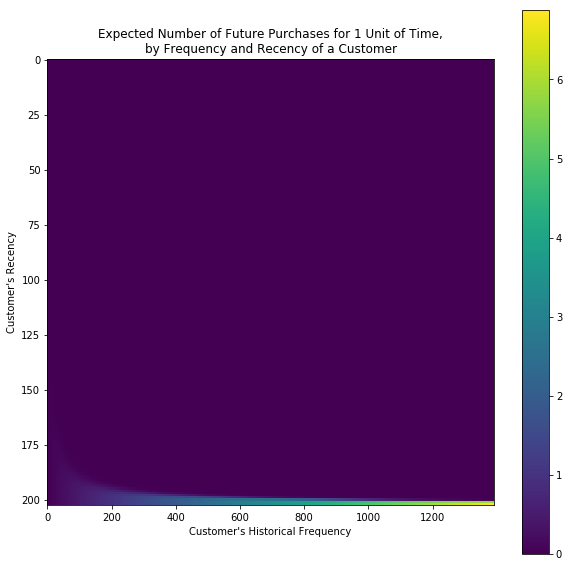

In [6]:
%matplotlib inline
plt.figure(figsize=(10,10))
plot_frequency_recency_matrix(bgf)
plt.show()

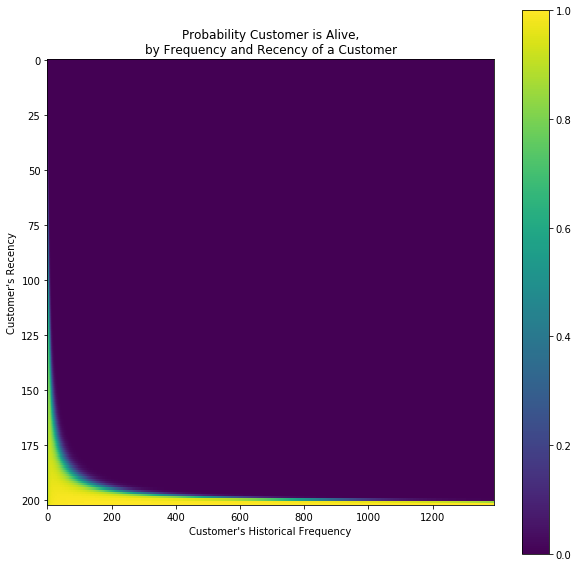

In [7]:
plt.figure(figsize=(10,10))
plot_probability_alive_matrix(bgf)
plt.show()

In [8]:
t =30
rfm_customer['predicted_orders'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t, rfm_customer['Frequency'], rfm_customer['Recency'], rfm_customer['T'])

C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:206: RuntimeWarning: invalid value encountered in log
  ln_hyp_term_alt = np.log(hyp2f1(_c - _a, _c - _b, _c, _z)) + \
C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:207: RuntimeWarning: divide by zero encountered in log
  (_c - _a - _b) * np.log(1 - _z)


In [9]:
returning = rfm_customer[rfm_customer['Frequency']>0]
returning=rfm_customer[rfm_customer['Monetary']>0]
returning.head()

,User_unique,Frequency,Recency,T,Monetary,predicted_orders
0,1,473,199,199,317100.0,69.992934
1,2,3,34,198,5700.0,0.017421
2,12,0,0,38,31100.0,0.042033
3,23,2,147,174,3500.0,0.268490
4,32,1,5,179,1100.0,0.003450


In [10]:
ggf = GammaGammaFitter()
ggf.fit(frequency=returning['Frequency'],monetary_value=returning['Monetary'])

C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\gamma_gamma_fitter.py:68: RuntimeWarning: divide by zero encountered in log
  (p * x) * np.log(x) -


<lifetimes.GammaGammaFitter: fitted with 48317 subjects, p: 0.50, q: 1.28, v: 19431.93>

In [11]:
CLV = ggf.conditional_expected_average_profit(returning['Frequency'], returning["Monetary"])
CLV=pd.DataFrame({"customer_unique":returning.User_unique ,"CLV": CLV})
CLV.head()

,customer_unique,CLV
0,1,316773.416237
1,2,10293.607269
2,12,35395.655324
3,23,10369.561715
4,32,13255.026531


In [23]:
CLV.describe()

,customer_unique,CLV
count,48317.000000,4.831700e+04
mean,68213.946292,2.460158e+04
std,35535.120469,3.436353e+04
min,1.000000,4.440534e+02
25%,38211.000000,8.672157e+03
50%,70944.000000,1.359833e+04
75%,98995.000000,3.539566e+04
max,137499.000000,2.926613e+06


## RFM Partner

In [12]:
rfm_partner = pd.read_excel("GG_all_final.xlsx", sheet_name="RFM_partner")

In [13]:
rfm_partner.head()

,Partner_unique,Min_of_created_date,Max_of_created_date,Count_of_orderId,Frequency,Recency,T,Monetary
0,100004.0,2016-05-05,2016-07-19,202,201,75,76,194800.0
1,100176.0,2016-05-03,2016-07-13,393,392,71,78,389200.0
2,100180.0,2016-05-02,2016-07-20,531,530,79,79,521700.0
3,100189.0,2016-05-03,2016-07-12,196,195,70,78,182800.0
4,100203.0,2016-05-03,2016-05-20,56,55,17,78,54600.0


In [14]:
rfm_partner=rfm_partner.drop(['Min_of_created_date', 'Max_of_created_date', 'Count_of_orderId'], axis=1)

In [15]:
t =30
rfm_partner['predicted_orders'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t,rfm_partner['Frequency'], rfm_partner['Recency'], rfm_partner['T'])
rfm_partner.head()

C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:206: RuntimeWarning: invalid value encountered in log
  ln_hyp_term_alt = np.log(hyp2f1(_c - _a, _c - _b, _c, _z)) + \
C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\beta_geo_fitter.py:207: RuntimeWarning: divide by zero encountered in log
  (_c - _a - _b) * np.log(1 - _z)


,Partner_unique,Frequency,Recency,T,Monetary,predicted_orders
0,100004.0,201,75,76,194800.0,7.457025e+01
1,100176.0,392,71,78,389200.0,2.175169e-11
2,100180.0,530,79,79,521700.0,1.927701e+02
3,100189.0,195,70,78,182800.0,3.743401e-05
4,100203.0,55,17,78,54600.0,1.602884e-33


In [16]:
part= rfm_partner[rfm_partner['Monetary']>0]
part.head()

,Partner_unique,Frequency,Recency,T,Monetary,predicted_orders
0,100004.0,201,75,76,194800.0,7.457025e+01
1,100176.0,392,71,78,389200.0,2.175169e-11
2,100180.0,530,79,79,521700.0,1.927701e+02
3,100189.0,195,70,78,182800.0,3.743401e-05
4,100203.0,55,17,78,54600.0,1.602884e-33


In [17]:
ggf = GammaGammaFitter()
ggf.fit(part['Frequency'], part['Monetary'])

C:\Users\Acer\Anaconda3\lib\site-packages\lifetimes\fitters\gamma_gamma_fitter.py:68: RuntimeWarning: divide by zero encountered in log
  (p * x) * np.log(x) -


<lifetimes.GammaGammaFitter: fitted with 1967 subjects, p: 0.01, q: 2.73, v: 81595489.59>

In [18]:
PLV = ggf.conditional_expected_average_profit(rfm_partner['Frequency'], rfm_partner['Monetary'])
PLV=pd.DataFrame({"partner_unique":part.Partner_unique,"PLV": PLV})

In [19]:
PLV.head()

,partner_unique,PLV
0,100004.0,362288.342671
1,100176.0,446619.113518
2,100180.0,540687.164394
3,100189.0,358209.287930
4,100203.0,451676.492318


In [26]:
PLV.describe()

,partner_unique,PLV
count,1966.000000,1.979000e+03
mean,69825.229908,5.888026e+05
std,39376.925929,3.204105e+05
min,2.000000,2.182604e+04
25%,43178.750000,3.918434e+05
50%,75071.000000,4.805377e+05
75%,104120.000000,6.167513e+05
max,137477.000000,2.874670e+06
